<a href="https://colab.research.google.com/github/Rishichaitanya-Nalluri/LogLU_ZenGrad/blob/main/Optimisers_Time_Complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SGD: 0.003431 seconds per run
AdaGrad: 0.004424 seconds per run
Adam: 0.007779 seconds per run
RMSprop: 0.005055 seconds per run
Adadelta: 0.006987 seconds per run
ZenGrad: 0.004538 seconds per run
Nadam: 0.012084 seconds per run


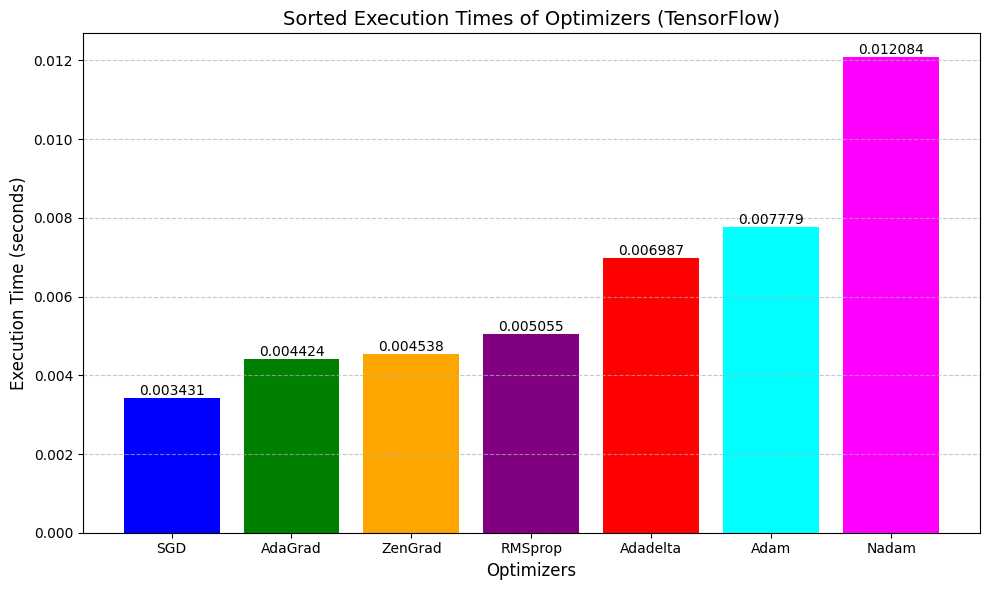

In [4]:
import tensorflow as tf
import timeit
from zengrad import ZenGrad  # Ensure the ZenGrad library is installed

# Dummy parameter vector and gradient
param_vector = tf.Variable(tf.random.uniform([10**6], -10, 10), trainable=True)
gradient = tf.random.uniform([10**6], -1, 1)

# TensorFlow optimizers
def tensorflow_sgd():
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    optimizer.apply_gradients([(gradient, param_vector)])

def tensorflow_adagrad():
    optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
    optimizer.apply_gradients([(gradient, param_vector)])

def tensorflow_adam():
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    optimizer.apply_gradients([(gradient, param_vector)])

def tensorflow_rmsprop():
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
    optimizer.apply_gradients([(gradient, param_vector)])

def tensorflow_adadelta():
    optimizer = tf.keras.optimizers.Adadelta(learning_rate=1.0)
    optimizer.apply_gradients([(gradient, param_vector)])

# ZenGrad optimizer
def tensorflow_zengrad():
    optimizer = ZenGrad(learning_rate=0.01)
    optimizer.apply_gradients([(gradient, param_vector)])

# Nadam optimizer
def tensorflow_nadam():
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.01)
    optimizer.apply_gradients([(gradient, param_vector)])

# Measure execution time for each optimizer
optimizers = {
    "SGD": tensorflow_sgd,
    "AdaGrad": tensorflow_adagrad,
    "Adam": tensorflow_adam,
    "RMSprop": tensorflow_rmsprop,
    "Adadelta": tensorflow_adadelta,
    "ZenGrad": tensorflow_zengrad,
    "Nadam": tensorflow_nadam,  # Added Nadam optimizer
}

execution_times = {}
for name, func in optimizers.items():
    time = timeit.timeit(func, number=10000)  # Measure total time for 10,000 runs
    execution_times[name] = time / 10000  # Average time per run in seconds

# Print execution times
for optimizer_name, avg_time in execution_times.items():
    print(f"{optimizer_name}: {avg_time:.6f} seconds per run")

# Sort execution times in ascending order
sorted_execution_times = dict(sorted(execution_times.items(), key=lambda item: item[1]))

# Plot sorted execution times
import matplotlib.pyplot as plt

# Extract sorted data for plotting
sorted_optimizers = list(sorted_execution_times.keys())
sorted_times = list(sorted_execution_times.values())

# Create bar chart with sorted execution times
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_optimizers, sorted_times, color=['blue', 'green', 'orange', 'purple', 'red', 'cyan', 'magenta'])

# Annotate bars with their values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.6f}", ha='center', va='bottom')

# Customize the plot
plt.title("Sorted Execution Times of Optimizers (TensorFlow)", fontsize=14)
plt.xlabel("Optimizers", fontsize=12)
plt.ylabel("Execution Time (seconds)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the graph
plt.tight_layout()
plt.show()
